<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/ProjekAkhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projek Akhir**



# Deskripsi Tujuan Bisnis

Tujuan dari dilakukannya projek ini adalah untuk memprediksi suatu penyakit. Untuk memprediksi penyakit dilakukan dengan melihat gejala-gejala yang dialami. Dengan melihat suatu gejala tersebut diharapkan si penderita mampu menemukan tindakan yang tepat untuk menangani penyakit tersebut. Meski begitu, prediksi hanyalah sebuah prediksi yang tidak 100% benar adanya. Namun, dengan adanya hal ini si penderita tidak perlu panik karena sudah tau cara pencegahan seperti apa yang tepat untuk dilakukan.

Secara spesifik, tujuan dari projek ini adalah untuk mengidentifikasi penyakit hepatisis dari segi gejalanya. 





# Analisa Pendekatan

Pendekatan yang dilakukan dalam projek ini adalah melalui *Decision Tree*. Karena suatu penyakit dapat memiliki lebih dari 1 gejala, maka contoh penggambaran *decision tree* adalah sebagai berikut,



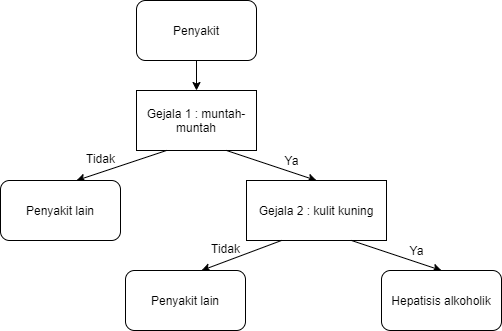




# Pengumpulan Data

Pengumpulan data dilakukan oleh [Sartina](https://atapdata.ai/user/109), seorang konsultan yang juga merupakan pengguna AtapData. Sartina dan temannya, Pratik Rathod bersama-sama membuat himpunan data ini dengan harapan agar para siswa mampu menciptakan suatu sistem kesehatan.

Link data dapat didapat di [link ini](https://atapdata.ai/dataset/152/PREDIKSI_GEJALA_PENYAKIT).





# Pemahaman Data

Data yang ditunjukkan terdiri dari kolom penyakit dan berbagai macam gejalanya. Suatu penyakit dinyatakan memiliki suatu gejala ditandai dengan '1' pada gejala yang dimiliki dan '0' untuk gejala yang tidak dimiliki.




Download library dan segala hal yang akan dibutuhkan nantinya

In [ ]:
import pandas as pd # import library to read data into dataframe
pd.set_option("display.max_columns", None)
import numpy as np # import numpy library
import re # import library for regular expression
import random # library for random number generation

Saatnya load data ke dalam dataframe yang bernama **penyakit**

In [ ]:
penyakit = pd.read_excel("disease.xlsx")
print("Data telah dimasukkan dalam dataframe")

Data telah dimasukkan dalam dataframe


Menampilkan beberapa baris awal data

In [ ]:
penyakit.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of_urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Mengetahui dimensi data

In [ ]:
penyakit.shape

(4920, 133)

Dataset penyakit terdiri dari 4.920 penyakit dan 133 gejala.



# Persiapan Data



Rincian data

In [ ]:
penyakit["Disease"].value_counts()

Osteoarthristis                            120
Psoriasis                                  120
Heart attack                               120
AIDS                                       120
Hypoglycemia                               120
Bronchial Asthma                           120
Common Cold                                120
Peptic ulcer diseae                        120
Impetigo                                   120
Dengue                                     120
Cervical spondylosis                       120
Tuberculosis                               120
Allergy                                    120
Hypothyroidism                             120
Typhoid                                    120
Migraine                                   120
hepatitis A                                120
Hyperthyroidism                            120
Jaundice                                   120
Varicose veins                             120
Dimorphic hemmorhoids(piles)               120
(vertigo) Par

Ada beberapa permasalahan seperti


*   Besar kecil huruf yang tidak konsisten
*   Nama kolom untuk gejala terdiri dari huruf kecil semua, sedangkan kolom penyakit tidak
*   Nama penyakit ada yang diberi penjelasan ada yang tidak









Mempersiapkan data


*   Mengubah nama kolom dan baris ke lowercase







In [ ]:
# memperbaiki nama kolom yang menampilkan penyakit dan gejala
column_names = penyakit.columns.values
column_names[0] = "disease"
penyakit.columns = column_names

# mengconvert nama penyakit ke lower case
penyakit["disease"] = penyakit["disease"].str.lower()

penyakit

,disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of_urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,fungal infection,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,fungal infection,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,


*   Menghilangkan penjelas pada penyakit





In [ ]:
# menghilangkan penjelas pada penyakit
penyakit.loc[penyakit["disease"] == "dimorphic hemmorhoids(piles)", "disease"] = "dimorphic hemmorhoids"
penyakit.loc[penyakit["disease"] == "paralysis (brain hemorrhage)", "disease"] = "paralysis"
penyakit.loc[penyakit["disease"] == "(vertigo) paroymsal  positional vertigo", "disease"] = "paroymsal  positional vertigo"

print("Penjelas sudah hilang")

Penjelas sudah hilang




*   Menghitung jumlah gejala yang muncul pada setiap penyakit, kemudian diurutkan dari yang paling sering muncul sampai yang jarang/tidak pernah muncul



In [ ]:
# menghitung setiap kolom
ing = penyakit.iloc[:, 1:].sum(axis=0)

# mendefinisikan setiap kolom sebagai seri panda
gejala = pd.Series(ing.index.values, index = np.arange(len(ing)))
count = pd.Series(list(ing), index = np.arange(len(ing)))

# membuat dataframe
ing_df = pd.DataFrame(dict(gejala = gejala, count = count))
ing_df = ing_df[["gejala", "count"]]
print(ing_df.to_string())

                             gejala  count
0                           itching    678
1                         skin_rash    786
2              nodal_skin_eruptions    108
3               continuous_sneezing    222
4                         shivering    108
5                            chills    798
6                        joint_pain    684
7                      stomach_pain    222
8                           acidity    222
9                  ulcers_on_tongue    108
10                   muscle_wasting    108
11                         vomiting   1914
12              burning_micturition    216
13               spotting_urination    108
14                          fatigue   1932
15                      weight_gain    114
16                          anxiety    114
17             cold_hands_and_feets    114
18                      mood_swings    228
19                      weight_loss    456
20                     restlessness    228
21                         lethargy    456
22         

In [ ]:
# mengurutkan gejala
ing_df.sort_values(["count"], ascending=False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)

print(ing_df)

                        gejala  count
0                      fatigue   1932
1                     vomiting   1914
2                   high_fever   1362
3             loss_of_appetite   1152
4                       nausea   1146
..                         ...    ...
127     extra_marital_contacts    108
128         spinning_movements    108
129  weakness_of_one_body_side    108
130        foul_smell_of_urine    102
131             fluid_overload      0

[132 rows x 2 columns]


Gejala yang paling sering muncul pada penyakit adalah
1.   Kelelahan/mudah lelah
2.   Muntah-muntah
3.   Demam tinggi
4.   Kehilangan nafsu makan
5.   Mual
dst.





# Pemodelan Data



Menginstall miniconda

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-12-11 03:34:58--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-12-11 03:34:58--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 43.6M 1s
    50K .......... .......... .......... .......... ..........  0%

Download dan install library dan dependies untuk membangun decision trees

In [ ]:
# import decision trees scikit-learn libraries
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

!conda install python-graphviz --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - python-graphviz


The following pack

Mengecek data

In [ ]:
penyakit.head()

,disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of_urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic_patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,fungal infection,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,fungal infection,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,fungal infection,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**[bamboo_tree] Penyakit Hepatitis**

Alasan membuat decision trees untuk penyakit hepatitis adalah karena tujuan awal membuat projek ini adalah untuk mengetahui keterkaitan pada gejala yang dimiliki oleh penyakit golongan hepatitis.

Membangun decision tree untuk penyakit hepatisis

In [ ]:
# memilih subset dari disease
penyakit_hepatitis = penyakit[penyakit.disease.isin(["hepatitis a", "hepatitis b", "hepatitis c", "hepatitis d", "hepatitis e"])]
hepatitis = penyakit_hepatitis["disease"]
gejala = penyakit_hepatitis.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=3)
bamboo_tree.fit(gejala, hepatitis)

print("Model decision tree telah dimasukkan ke bamboo_tree")

Model decision tree telah dimasukkan ke bamboo_tree


Membuat plot decision tree dan menganalisis hasilnya

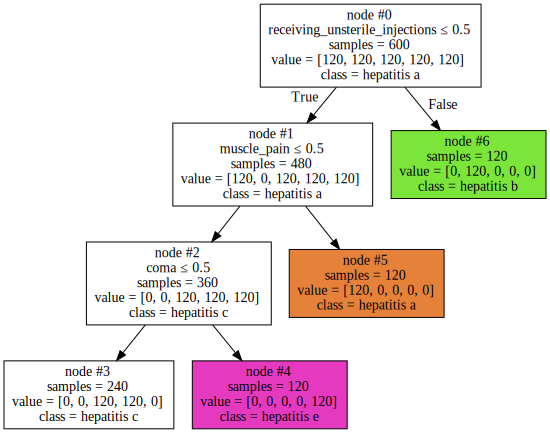

In [ ]:
export_graphviz(bamboo_tree,
                feature_names=list(gejala.columns.values),
                out_file="bamboo_tree.dot",
                class_names=np.unique(hepatitis),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

Dapat disimpulkan
*   Jika menerima suntikan tidak steril maka termasuk Hepatisis B 
*   Jika tidak menerima suntikan tidak steril, namun mengalami nyeri otot maka termasuk Hepatitis A
*   Jika tidak menerima suntikan tidak steril, tidak mengalami nyeri otot, namun mengalami koma maka termasuk Hepatitis E
*   Jika tidak menerima suntikan tidak steril, tidak mengalami nyeri otot, dan tidak mengalami koma maka termasuk Hepatitis C



# Evaluasi Model

Untuk mengevaluasi berbagai jenis penyakit hepatitis, dataset akan dibagai menjadi dua yakni, satu training set dan satu test set. Decision tree akan dibuat berdasarkan training set dan mengujinya pada test set. Lalu, hasilnya akan dibandingkan dengan penyakit yang diprediksi oleh model.

Membuat dataframe baru bernama bamboo

In [ ]:
bamboo = penyakit[penyakit.disease.isin(["hepatitis a", "hepatitis b", "hepatitis c", "hepatitis d", "hepatitis e"])]
print("Dataframe berhasil dibuat")

Dataframe berhasil dibuat


Mengecek banyaknya penyakit yang ada

In [ ]:
bamboo["disease"].value_counts()

hepatitis a    120
hepatitis d    120
hepatitis e    120
hepatitis b    120
hepatitis c    120
Name: disease, dtype: int64

Menggunakan 40 data untuk setiap penyakit yang akan digunakan ke test set, dan menamakannya 'sample_n'

In [ ]:
# set sample size
sample_n = 40

Membuat dataframe yang berisi 40 data dan dipilih secara acak

In [ ]:
# mengambil 40 data dari setiap penyakit
random.seed(1234)
bamboo_test = bamboo.groupby("disease", group_keys=False).apply(lambda x: x.sample(sample_n))

bamboo_test_gejala = bamboo_test.iloc[:,1:] # gejala
bamboo_test_disease = bamboo_test["disease"]
print("Dataframe berhasil dibuat")

Dataframe berhasil dibuat


Mengecek jumlah value bamboo_test yang harusnya berjumlah 40 untuk setiap penyakit

In [ ]:
bamboo_test["disease"].value_counts()

hepatitis a    40
hepatitis d    40
hepatitis e    40
hepatitis b    40
hepatitis c    40
Name: disease, dtype: int64

Membuat training set dengan menghapus test set dari bamboo_test. Training set akan dinamai bamboo_train.

In [ ]:
bamboo_test_index = bamboo.index.isin(bamboo_test.index)
bamboo_train = bamboo[~bamboo_test_index]

bamboo_train_gejala = bamboo_train.iloc[:,1:] # gejala
bamboo_train_disease = bamboo_train["disease"]
print("Proses berhasil")

Proses berhasil


Mengecek value training set yang seharusnya berjumlah 80 untuk setiap penyakit

In [ ]:
bamboo_train["disease"].value_counts()

hepatitis a    80
hepatitis d    80
hepatitis e    80
hepatitis b    80
hepatitis c    80
Name: disease, dtype: int64

Membuat decision tree menggunakan training set (bamboo_train) dan menamai generated tree, bamboo_train_tree, untuk prediksi.

In [ ]:
bamboo_train_tree = tree.DecisionTreeClassifier(max_depth=15)
bamboo_train_tree.fit(bamboo_train_gejala, bamboo_train_disease)

print("Model decision tree tersimpan ke bamboo_train_tree")

Model decision tree tersimpan ke bamboo_train_tree


Plot decision tree dan mengeksplornya

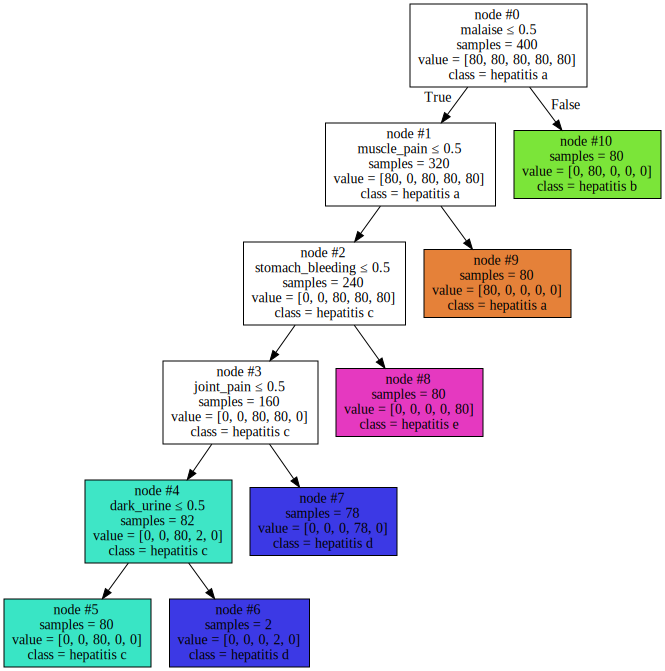

In [ ]:
export_graphviz(bamboo_train_tree,
                feature_names=list(bamboo_train_gejala.columns.values),
                out_file="bamboo_train_tree.dot",
                class_names=np.unique(bamboo_train_disease),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("bamboo_train_tree.dot") as bamboo_train_tree_image:
    bamboo_train_tree_graph = bamboo_train_tree_image.read()
graphviz.Source(bamboo_train_tree_graph)

**Mengetes model yang dibuat ke test data**

In [ ]:
bamboo_pred_disease = bamboo_train_tree.predict(bamboo_test_gejala)

Membuat confusion matrix untuk mengidentifikasi penyakit mana yang terkadang salah diklasifikasikan ke penyakit lain.

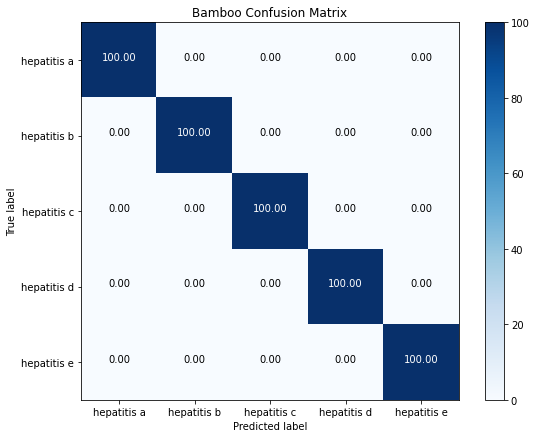

In [ ]:
test_disease = np.unique(bamboo_test_disease)
bamboo_confusion_matrix = confusion_matrix(bamboo_test_disease, bamboo_pred_disease, test_disease)
title = 'Bamboo Confusion Matrix'
cmap = plt.cm.Blues

plt.figure(figsize=(8, 6))
bamboo_confusion_matrix = (
    bamboo_confusion_matrix.astype('float') / bamboo_confusion_matrix.sum(axis=1)[:, np.newaxis]
    ) * 100

plt.imshow(bamboo_confusion_matrix, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(test_disease))
plt.xticks(tick_marks, test_disease)
plt.yticks(tick_marks, test_disease)

fmt = '.2f'
thresh = bamboo_confusion_matrix.max() / 2.
for i, j in itertools.product(range(bamboo_confusion_matrix.shape[0]), range(bamboo_confusion_matrix.shape[1])):
    plt.text(j, i, format(bamboo_confusion_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if bamboo_confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

Dari hasil di atas dapat disimpulkan bahwa tidak ada hepatitis yang diklasifikasikan ke jenis penyakit hepatitis yang lain. 
*   100% Hepatitis A diklasifikasikan ke Hepatitis A
*   100% Hepatitis B diklasifikasikan ke Hepatitis B
*   100% Hepatitis C diklasifikasikan ke Hepatitis C
*   100% Hepatitis D diklasifikasikan ke Hepatitis D
*   100% Hepatitis E diklasifikasikan ke Hepatitis E
